In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# Load training and development data
mal_train = pd.read_csv('/content/drive/MyDrive/NLP Project/Hom_Trans_Multilingual/Datasets/malayalam/homo_mal_3_train.csv')
mal_dev = pd.read_csv('/content/drive/MyDrive/NLP Project/Hom_Trans_Multilingual/Datasets/malayalam/homo_mal_3_dev.csv')

In [4]:
mal_train

,Unnamed: 0,text,category
0,0,A odeda mandan kunappi kandam vazhi maha duran...,Non-anti-LGBT+ content
1,1,ഇത് കോഴിക്കോടൻ മാരുടെ വിജയം,Non-anti-LGBT+ content
2,2,Mumbail poyal ivarude thaനീ niram kaanamPaisa ...,Transphobia
3,3,Sreekandan nair അവരെ കളിയാക്കുന്നു എന്ന് എനിക്...,Non-anti-LGBT+ content
4,4,ayyeeeivanonnum naanam illeeeesnehikkunna aali...,Transphobia
...,...,...,...
3109,3109,Ellarum നിവിനിലെ നടനിലെ റേഞ്ച് കണ്ടോ എന്ന് ചൊത...,Non-anti-LGBT+ content
3110,3110,Nikhil Varghesevhotfe ഞാൻ കുണ്ടൻ അല്ല അതിനു,Homophobia
3111,3111,പിന്നെ ആ ഫിലിം എന്താണ് പറയുന്നത് എന്ന് മനസിലാക...,Non-anti-LGBT+ content
3112,3112,അതിരു കടന്ന മേക്കപ്പും ഗ്ലാമർസ് ആയ വീഡിയോസും ...,Non-anti-LGBT+ content


In [5]:
# Remove the Unnamed: 0 column
mal_train.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
mal_train

,text,category
0,A odeda mandan kunappi kandam vazhi maha duran...,Non-anti-LGBT+ content
1,ഇത് കോഴിക്കോടൻ മാരുടെ വിജയം,Non-anti-LGBT+ content
2,Mumbail poyal ivarude thaനീ niram kaanamPaisa ...,Transphobia
3,Sreekandan nair അവരെ കളിയാക്കുന്നു എന്ന് എനിക്...,Non-anti-LGBT+ content
4,ayyeeeivanonnum naanam illeeeesnehikkunna aali...,Transphobia
...,...,...
3109,Ellarum നിവിനിലെ നടനിലെ റേഞ്ച് കണ്ടോ എന്ന് ചൊത...,Non-anti-LGBT+ content
3110,Nikhil Varghesevhotfe ഞാൻ കുണ്ടൻ അല്ല അതിനു,Homophobia
3111,പിന്നെ ആ ഫിലിം എന്താണ് പറയുന്നത് എന്ന് മനസിലാക...,Non-anti-LGBT+ content
3112,അതിരു കടന്ന മേക്കപ്പും ഗ്ലാമർസ് ആയ വീഡിയോസും ...,Non-anti-LGBT+ content


In [7]:
# Count the number of examples in each class
class_distribution_train = mal_train['category'].value_counts()
class_distribution_valid = mal_dev['category'].value_counts()

print("\nClass Distribution in Training Data:")
print(class_distribution_train)

print("\nClass Distribution in Validation Data:")
print(class_distribution_valid)



Class Distribution in Training Data:
category
Non-anti-LGBT+ content    2468
Homophobia                 476
Transphobia                170
Name: count, dtype: int64

Class Distribution in Validation Data:
category
Non-anti-LGBT+ content    937
Homophobia                197
Transphobia                79
Name: count, dtype: int64


In [8]:
# Display the first few rows of the training data
print("Training Data:")
print(mal_train.head())

# Display information about the training data
print("\nTraining Data Info:")
print(mal_train.info())

# Check for any missing values
print("\nMissing Values in Training Data:")
print(mal_train.isnull().sum())


Training Data:
                                                text                category
0  A odeda mandan kunappi kandam vazhi maha duran...  Non-anti-LGBT+ content
1                        ഇത് കോഴിക്കോടൻ മാരുടെ വിജയം  Non-anti-LGBT+ content
2  Mumbail poyal ivarude thaനീ niram kaanamPaisa ...             Transphobia
3  Sreekandan nair അവരെ കളിയാക്കുന്നു എന്ന് എനിക്...  Non-anti-LGBT+ content
4  ayyeeeivanonnum naanam illeeeesnehikkunna aali...             Transphobia

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      3114 non-null   object
 1   category  3114 non-null   object
dtypes: object(2)
memory usage: 48.8+ KB
None

Missing Values in Training Data:
text        0
category    0
dtype: int64


In [9]:
from collections import Counter

# Tokenize the text
all_words = " ".join(mal_train['text']).split()
word_freq = Counter(all_words)

# Display the most common words
print("\nMost Common Words:")
print(word_freq.most_common(20))



Most Common Words:
[('ഒരു', 330), ('oru', 213), ('ആണ്', 210), ('എന്ന്', 163), ('ഈ', 151), ('അത്', 151), ('ഞാൻ', 124), ('തന്നെ', 120), ('ഇത്', 115), ('aanu', 92), ('പോലെ', 92), ('കുന്ദൻ', 78), ('അവർ', 76), ('ee', 76), ('pole', 75), ('ഒക്കെ', 72), ('ആ', 70), ('ennu', 69), ('ഗേ', 68), ('നിങ്ങൾ', 67)]


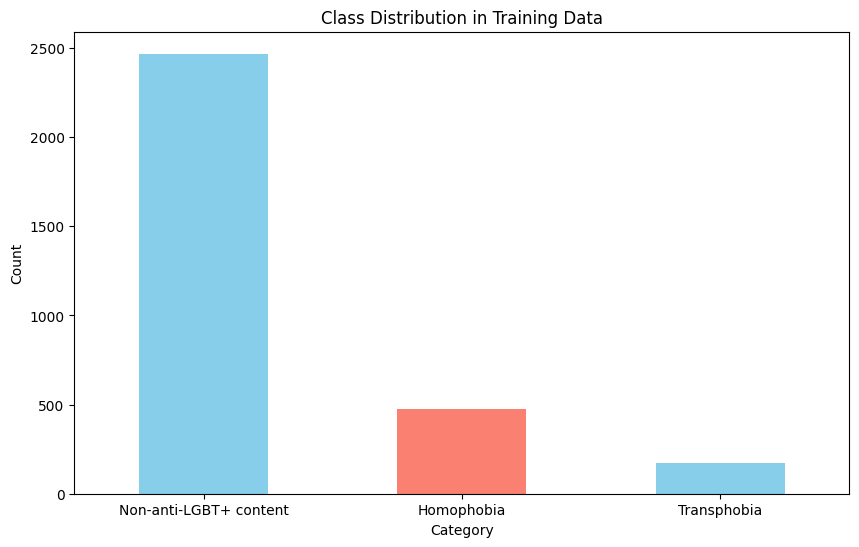

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Plot class distribution
plt.figure(figsize=(10, 6))
mal_train['category'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution in Training Data')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


## mBert

In [ ]:
# import torch
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder
# from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
# from sklearn.metrics import classification_report, confusion_matrix

# # Set device
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Drop NaN values
# mal_train.dropna(inplace=True)
# mal_dev.dropna(inplace=True)

# # Get text and labels
# train_texts = mal_train["text"].tolist()
# train_labels = mal_train["category"].tolist()

# valid_texts = mal_dev["text"].tolist()
# valid_labels = mal_dev["category"].tolist()

# # Encode labels using LabelEncoder
# label_encoder = LabelEncoder()
# train_labels = label_encoder.fit_transform(train_labels)
# valid_labels = label_encoder.transform(valid_labels)

# # Load the mBERT tokenizer and model
# tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-uncased")
# model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-uncased", num_labels=3)

# # Tokenize the data
# train_encodings = tokenizer(train_texts, truncation=True, padding=True, return_tensors='pt')
# valid_encodings = tokenizer(valid_texts, truncation=True, padding=True, return_tensors='pt')

# # Create PyTorch datasets
# train_dataset = torch.utils.data.TensorDataset(
#     train_encodings["input_ids"],
#     train_encodings["attention_mask"],
#     torch.tensor(train_labels)
# )

# valid_dataset = torch.utils.data.TensorDataset(
#     valid_encodings["input_ids"],
#     valid_encodings["attention_mask"],
#     torch.tensor(valid_labels)
# )

# batch_size = 8
# train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

# optimizer = AdamW(model.parameters(), lr=1e-5)
# num_epochs = 5

# total_steps = len(train_loader) * num_epochs
# scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# model.to(device)

# # Training the model
# model.train()
# for epoch in range(num_epochs):
#     print(f"Epoch {epoch + 1}/{num_epochs}")
#     for batch in train_loader:
#         input_ids, attention_mask, labels = batch
#         input_ids = input_ids.to(device)
#         attention_mask = attention_mask.to(device)
#         labels = labels.to(device)

#         optimizer.zero_grad()

#         outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
#         loss = outputs.loss
#         loss.backward()
#         optimizer.step()
#         scheduler.step()

# # Save the trained model
# output_dir = "/content/drive/MyDrive/NLP Project/Hom_Trans_Multilingual/Models/mbert"
# model.save_pretrained(output_dir)
# tokenizer.save_pretrained(output_dir)

# # Step 3: Generating predictions
# model.eval()
# predictions = []

# with torch.no_grad():
#     for batch in valid_loader:
#         input_ids, attention_mask, labels = batch
#         input_ids = input_ids.to(device)
#         attention_mask = attention_mask.to(device)

#         outputs = model(input_ids=input_ids, attention_mask=attention_mask)
#         logits = outputs.logits
#         preds = torch.argmax(logits, dim=1)
#         predictions.extend(preds.cpu().numpy())

# # Step 4: Evaluating the model
# class_names = ["Non-anti-LGBT+ content", "Homophobia", "Transphobia"]
# print("Classification Report:")
# print(classification_report(valid_labels, predictions, target_names=class_names))

# print("Confusion Matrix:")
# print(confusion_matrix(valid_labels, predictions))


### RandomOversample

In [ ]:
import torch
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from sklearn.metrics import classification_report, confusion_matrix
# Import necessary library
from imblearn.over_sampling import RandomOverSampler

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Drop NaN values
mal_train.dropna(inplace=True)
mal_dev.dropna(inplace=True)

# Get text and labels
train_texts = mal_train["text"].tolist()
train_labels = mal_train["category"].tolist()

valid_texts = mal_dev["text"].tolist()
valid_labels = mal_dev["category"].tolist()

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
valid_labels = label_encoder.transform(valid_labels)

# Use RandomOverSampler for text data
# SMOTE is not applicable for text data
ros = RandomOverSampler(random_state=42)
train_indices, train_labels_resampled = ros.fit_resample(
    pd.DataFrame(range(len(train_texts))), pd.DataFrame(train_labels)
)
train_texts_resampled = [train_texts[i] for i in train_indices[0]]
train_labels_resampled = train_labels_resampled[0].tolist()

# Load the mBERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-uncased", num_labels=3)

# Tokenize the data using resampled data
train_encodings = tokenizer(train_texts_resampled, truncation=True, padding=True, return_tensors='pt')
valid_encodings = tokenizer(valid_texts, truncation=True, padding=True, return_tensors='pt')

# Create PyTorch datasets
train_dataset = torch.utils.data.TensorDataset(
    train_encodings["input_ids"],
    train_encodings["attention_mask"],
    torch.tensor(train_labels_resampled) # Use resampled labels
)

valid_dataset = torch.utils.data.TensorDataset(
    valid_encodings["input_ids"],
    valid_encodings["attention_mask"],
    torch.tensor(valid_labels)
)

valid_dataset = torch.utils.data.TensorDataset(
    valid_encodings["input_ids"],
    valid_encodings["attention_mask"],
    torch.tensor(valid_labels)
)

batch_size = 8
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

optimizer = AdamW(model.parameters(), lr=1e-5)
num_epochs = 5

total_steps = len(train_loader) * num_epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

model.to(device)

# Training the model
model.train()
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        scheduler.step()

# Save the trained model
output_dir = "/content/drive/MyDrive/NLP Project/Hom_Trans_Multilingual/Models/mal_mbert"
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Step 3: Generating predictions
model.eval()
predictions = []

with torch.no_grad():
    for batch in valid_loader:
        input_ids, attention_mask, labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)
        predictions.extend(preds.cpu().numpy())

# Step 4: Evaluating the model
class_names = ["Non-anti-LGBT+ content", "Homophobia", "Transphobia"]
print("Classification Report:")
print(classification_report(valid_labels, predictions, target_names=class_names))

print("Confusion Matrix:")
print(confusion_matrix(valid_labels, predictions))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/672M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
Classification Report:
                        precision    recall  f1-score   support

Non-anti-LGBT+ content       0.85      0.87      0.86       197
            Homophobia       0.96      0.96      0.96       937
           Transphobia       0.90      0.82      0.86        79

              accuracy                           0.94      1213
             macro avg       0.90      0.89      0.89      1213
          weighted avg       0.94      0.94      0.94      1213

Confusion Matrix:
[[172  25   0]
 [ 28 902   7]
 [  2  12  65]]


## MuRIL

In [11]:
import torch
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Drop NaN values
mal_train.dropna(inplace=True)
mal_dev.dropna(inplace=True)

# Get text and labels
train_texts = mal_train["text"].tolist()
train_labels = mal_train["category"].tolist()

valid_texts = mal_dev["text"].tolist()
valid_labels = mal_dev["category"].tolist()

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
valid_labels = label_encoder.transform(valid_labels)

# Load the IndicBERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("google/muril-base-cased")
model = BertForSequenceClassification.from_pretrained("google/muril-base-cased", num_labels=3)

# Tokenize the data
train_encodings = tokenizer(train_texts, truncation=True, padding=True, return_tensors='pt')
valid_encodings = tokenizer(valid_texts, truncation=True, padding=True, return_tensors='pt')

# Create PyTorch datasets
train_dataset = torch.utils.data.TensorDataset(
    train_encodings["input_ids"],
    train_encodings["attention_mask"],
    torch.tensor(train_labels)
)

valid_dataset = torch.utils.data.TensorDataset(
    valid_encodings["input_ids"],
    valid_encodings["attention_mask"],
    torch.tensor(valid_labels)
)

batch_size = 8
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

optimizer = AdamW(model.parameters(), lr=1e-5)
num_epochs = 5

total_steps = len(train_loader) * num_epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

model.to(device)

# Training the model
model.train()
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        scheduler.step()

# Save the trained model
output_dir = "/content/drive/MyDrive/NLP Project/Hom_Trans_Multilingual/Models/MuRIL"
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Step 3: Generating predictions
model.eval()
predictions = []

with torch.no_grad():
    for batch in valid_loader:
        input_ids, attention_mask, labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)
        predictions.extend(preds.cpu().numpy())

# Step 4: Evaluating the model
class_names = ["Non-anti-LGBT+ content", "Homophobia", "Transphobia"]
print("Classification Report:")
print(classification_report(valid_labels, predictions, target_names=class_names))

print("Confusion Matrix:")
print(confusion_matrix(valid_labels, predictions))


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/206 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/3.16M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/113 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/411 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/953M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/muril-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
Classification Report:
                        precision    recall  f1-score   support

Non-anti-LGBT+ content       0.00      0.00      0.00       197
            Homophobia       0.77      1.00      0.87       937
           Transphobia       0.00      0.00      0.00        79

              accuracy                           0.77      1213
             macro avg       0.26      0.33      0.29      1213
          weighted avg       0.60      0.77      0.67      1213

Confusion Matrix:
[[  0 197   0]
 [  0 937   0]
 [  0  79   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## XLM-RoBERTa

In [12]:
import torch
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from transformers import XLMRobertaTokenizer, XLMRobertaForSequenceClassification, AdamW, get_linear_schedule_with_warmup

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Drop NaN values
mal_train.dropna(inplace=True)
mal_dev.dropna(inplace=True)

# Get text and labels
train_texts = mal_train["text"].tolist()
train_labels = mal_train["category"].tolist()

valid_texts = mal_dev["text"].tolist()
valid_labels = mal_dev["category"].tolist()

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
valid_labels = label_encoder.transform(valid_labels)

# Load the XLM-RoBERTa tokenizer and model
tokenizer = XLMRobertaTokenizer.from_pretrained("xlm-roberta-base")
model = XLMRobertaForSequenceClassification.from_pretrained("xlm-roberta-base", num_labels=3)

# Tokenize the data
train_encodings = tokenizer(train_texts, truncation=True, padding=True, return_tensors='pt')
valid_encodings = tokenizer(valid_texts, truncation=True, padding=True, return_tensors='pt')

# Create PyTorch datasets
train_dataset = torch.utils.data.TensorDataset(
    train_encodings["input_ids"],
    train_encodings["attention_mask"],
    torch.tensor(train_labels)
)

valid_dataset = torch.utils.data.TensorDataset(
    valid_encodings["input_ids"],
    valid_encodings["attention_mask"],
    torch.tensor(valid_labels)
)

batch_size = 8
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

optimizer = AdamW(model.parameters(), lr=1e-5)
num_epochs = 5

total_steps = len(train_loader) * num_epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

model.to(device)

# Training the model
model.train()
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        scheduler.step()

# Save the trained model
output_dir = "/content/drive/MyDrive/NLP Project/Hom_Trans_Multilingual/Models/xlm-roberta"
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Step 3: Generating predictions
model.eval()
predictions = []

with torch.no_grad():
    for batch in valid_loader:
        input_ids, attention_mask, labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)
        predictions.extend(preds.cpu().numpy())

# Step 4: Evaluating the model
class_names = ["Non-anti-LGBT+ content", "Homophobia", "Transphobia"]
print("Classification Report:")
print(classification_report(valid_labels, predictions, target_names=class_names))

print("Confusion Matrix:")
print(confusion_matrix(valid_labels, predictions))


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
Classification Report:
                        precision    recall  f1-score   support

Non-anti-LGBT+ content       0.65      0.75      0.69       197
            Homophobia       0.90      0.94      0.92       937
           Transphobia       0.00      0.00      0.00        79

              accuracy                           0.85      1213
             macro avg       0.52      0.57      0.54      1213
          weighted avg       0.80      0.85      0.82      1213

Confusion Matrix:
[[148  49   0]
 [ 52 885   0]
 [ 29  50   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
